In [1]:
!pip install kaggle
%pip install kagglehub


In [10]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Users\HP\Desktop\Medical analysis\kaggle.json'


In [11]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other




  0%|          | 0.00/2.29G [00:00<?, ?B/s]
  0%|          | 1.00M/2.29G [00:01<55:02, 746kB/s]
  0%|          | 2.00M/2.29G [00:01<27:53, 1.47MB/s]
  0%|          | 4.00M/2.29G [00:01<12:30, 3.28MB/s]
  0%|          | 6.00M/2.29G [00:01<07:38, 5.36MB/s]
  0%|          | 9.00M/2.29G [00:02<04:47, 8.54MB/s]
  1%|          | 12.0M/2.29G [00:02<03:37, 11.3MB/s]
  1%|          | 14.0M/2.29G [00:02<03:09, 12.9MB/s]
  1%|          | 16.0M/2.29G [00:02<02:49, 14.5MB/s]
  1%|          | 18.0M/2.29G [00:02<02:34, 15.8MB/s]
  1%|          | 20.0M/2.29G [00:02<02:28, 16.4MB/s]
  1%|          | 23.0M/2.29G [00:02<02:15, 18.0MB/s]
  1%|          | 25.0M/2.29G [00:02<02:10, 18.7MB/s]
  1%|          | 27.0M/2.29G [00:03<02:08, 18.9MB/s]
  1%|▏         | 30.0M/2.29G [00:03<02:02, 19.9MB/s]
  1%|▏         | 32.0M/2.29G [00:03<02:04, 19.4MB/s]
  1%|▏         | 34.0M/2.29G [00:03<02:02, 19.8MB/s]
  2%|▏         | 37.0M/2.29G [00:03<01:59, 20.3MB/s]
  2%|▏         | 39.0M/2.29G [00:03<01:58, 20.4MB/s]
  

In [12]:
import zipfile

# Define the downloaded file and extraction path
zip_file_path = "chest-xray-pneumonia.zip"
extract_to = "./chest_xray_pneumonia/"

# Extract the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset extracted successfully.")


Dataset extracted successfully.


In [13]:
import os

# Verify the extracted files
extracted_files = os.listdir(extract_to)
print("Extracted files:", extracted_files)


Extracted files: ['chest_xray']


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix


In [3]:

base_dir = r'C:\Users\HP\Desktop\Medicalanalysis\chest_xray_pneumonia\chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy'])


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

history = model.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size),
    epochs=10,
    validation_data=val_generator,
    validation_steps=max(1, val_generator.samples // val_generator.batch_size)
)


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 124s 758ms/step - accuracy: 0.7473 - loss: 0.9097 - val_accuracy: 0.6250 - val_loss: 1.0054
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 620ms/step - accuracy: 0.8668 - loss: 0.2996 - val_accuracy: 0.6875 - val_loss: 0.6213
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 626ms/step - accuracy: 0.8854 - loss: 0.2673 - val_accuracy: 0.7500 - val_loss: 0.5769
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 624ms/step - accuracy: 0.8934 - loss: 0.2549 - val_accuracy: 0.8125 - val_loss: 0.5299
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 622ms/step - accuracy: 0.9031 - loss: 0.2398 - val_accuracy: 0.7500 - val_loss: 0.5199
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 623ms/step - accuracy: 0.9187 - loss: 0.2194 - val_accuracy: 0.7500 - val_loss: 0.8014
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 621ms/step - accuracy: 0.9185 - loss: 0.2110 - val_accuracy: 0.8750 - val_loss: 0.2882
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 620ms/step - accuracy: 0.9137 -

In [7]:

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.6082 - loss: 0.8006
Test Loss: 0.4479696750640869
Test Accuracy: 0.7960526347160339


In [9]:



model.save('best_chest_xray_model.keras')



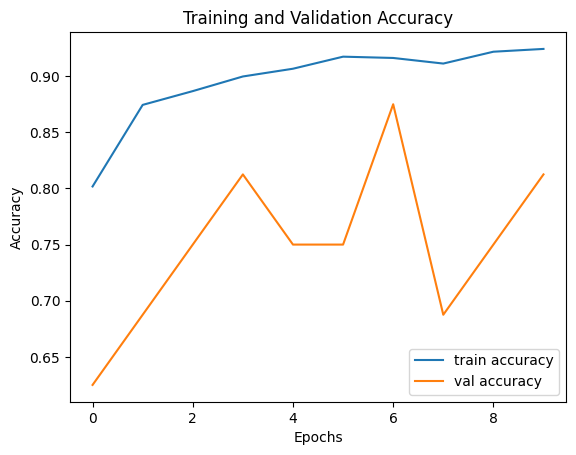

In [11]:

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


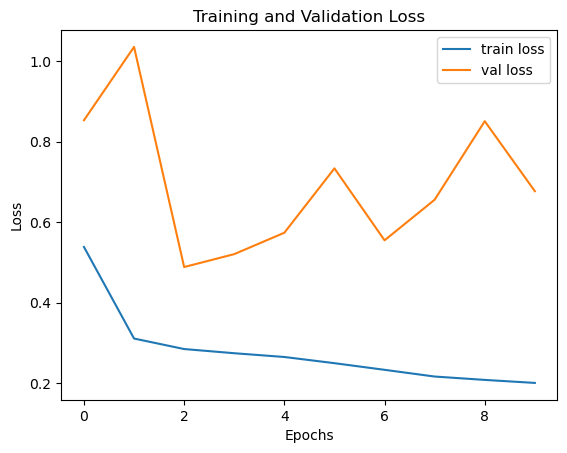

In [22]:

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [12]:

steps = test_generator.samples // test_generator.batch_size
if test_generator.samples % test_generator.batch_size != 0:
    steps += 1


predictions = model.predict(test_generator, steps=steps)
test_preds = (predictions > 0.5).astype(int).flatten()

test_preds = test_preds[:len(test_generator.classes)]


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step


In [13]:
print(f"True labels: {len(test_generator.classes)}")
print(f"Predicted labels: {len(test_preds)}")


True labels: 624
Predicted labels: 624


In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_generator.classes, test_preds)
print(cm)


[[121 113]
 [ 11 379]]


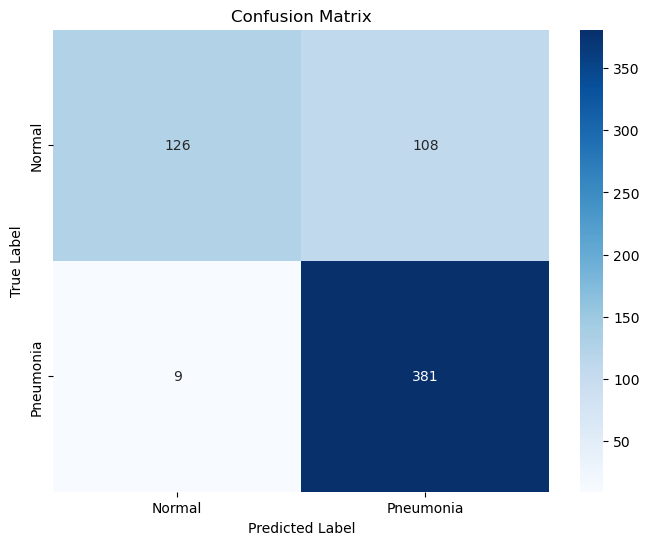

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Pneumonia'],  # Adjust labels as needed
            yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


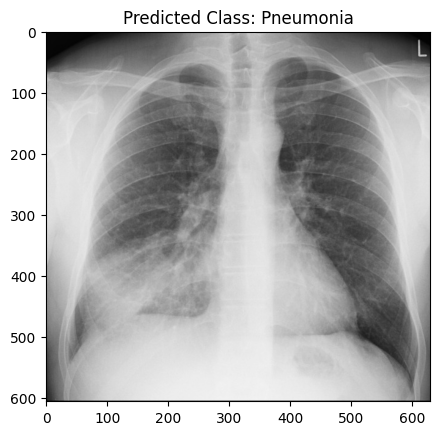

Predicted Class: Pneumonia


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('best_chest_xray_model.keras')

def preprocess_image(img_path, target_size=(224, 224)):
    """Preprocess the image to match model input requirements."""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array
    return img_array

def predict_image(img_path):
    """Predict the class of the new image."""
    img_array = preprocess_image(img_path)


    prediction = model.predict(img_array)


    predicted_class = (prediction > 0.5).astype(int)


    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted Class: {'Pneumonia' if predicted_class == 1 else 'Normal'}")
    plt.show()

    return predicted_class

img_path = r'C:\Users\HP\Desktop\Medicalanalysis\Pneumania.jpeg'
predicted_class = predict_image(img_path)
print(f"Predicted Class: {'Pneumonia' if predicted_class == 1 else 'Normal'}")
